# Um salto para ir além: O coeficiente de correlação de Pearson


O coeficiente de correlação é uma ferramenta muito importante para análise dos dados, especialmente na analise exploratória: ele nos indica, de forma bem simples, se existe uma relação *linear* entre duas variáveis. Esta informação auxilia em tomadas de decisão das análises que seguem. 

Por exemplo, se um conjunto de dados apresenta forte correlação linear, provavelmente será bem representado pela equação da reta, e, portanto, o modelo linear deve ser investigado. Mas, caso o o conjunto de dados não apresente correlação linear significativa, a equação da reta deixa de ser um modelo plausível, e outros modelos (quadráticos, não lineares, etc) devem ser estudados para entender melhor a relação entre as variáveis. 


O coeficiente deve ser encarado como um *indicativo* da intensidade da relação entre as variáveis, e não como um parâmetro de decisão final (ele indica *apenas* se existe relação linear, o que não necessariamente indica efeito causal). Ele é estimado de forma muito simples: é calculado pela divisão entre a covariância das variáveis e o produto de suas respectivas variâncias, ou seja:

$$r_{pearson} = \frac{\sum_{i=1}^n \left(x_i - \overline{x}\right) \left(y_i - \overline{y}\right)}{\sqrt{\sum_{i=1}^n \left( x_i - \overline{x}\right)^2 \sum_{i=1}^n \left( y_i - \overline{y}\right)^2}}$$

onde
- $x_i$ é a i-ésima observação da variável independente;
- $\overline{x}$ é a média da variável independente;
- $y_i$ é a i-ésima observação da variável dependente;
- $\overline{y}$ é a média da variável dependente;
- $n$ é o número total de observações;


O resultado varia entre $-1$ e $+1$, onde $-1$ indica uma correlação perfeita negativa, $0$ indica ausência de correlação linear e $+1$ indica uma correlação perfeita positiva:

![alt text](https://raw.githubusercontent.com/andersonmdcanteli/statistic/master/Python/pt-br/r-pearson/gif.gif "gif gerado com os gráficos de Pearson")

Contudo, existem alguns pontos, que, embora importantes, geralmente ficam de fora da discussão em relação ao seu valor:

- O intervalo de confiança não é simétrico em relação ao valor médio;
- O intervalo de confiança é largo;
- É altamente influenciado pela presença de outliers;

Neste artigo será abordado as três questões acima. Para isto, vamos utilizar um conjunto de dados que contém a medida do comprimento ($mm$) e da largura ($mm$) do nariz de 45 cangurus cinza (todos machos):


| Comprimento (mm) | Largura |
| :-: | :-: |
| 609 | 241 |
| 629 | 222 |
| 620 | 233 |
| 564 | 207 |
| 645 | 247 |
| 493 | 189 |
| 606 | 226 |
| 660 | 240 |
| 630 | 215 |
| 672 | 231 |
| 778 | 263 |
| 616 | 220 |
| 727 | 271 |
| 810 | 284 |
| 778 | 279 |
| 823 | 272 |
| 755 | 268 |
| 710 | 278 |
| 701 | 238 |
| 803 | 255 | 
| 855 | 308 |
| 838 | 281 |
| 830 | 288 |
| 864 | 306 |
| 635 | 236 |
| 565 | 204 |
| 562 | 216 |
| 580 | 225 |
| 596 | 220 |
| 597 | 219 |
| 636 | 201 |
| 559 | 213 |
| 615 | 228 |
| 740 | 234 |
| 677 | 237 |
| 675 | 217 |
| 629 | 211 |
| 692 | 238 |
| 710 | 221 |
| 730 | 281 |
| 763 | 292 |
| 686 | 251 |
| 717 | 231 |
| 737 | 275 |
| 816 | 275 |



![alt text](https://raw.githubusercontent.com/andersonmdcanteli/statistic/master/Python/pt-br/r-pearson/cangurus.png "dois cangurus cinza, possívelmente mãe e filhos, lado a lado olhando para a direção da camera")

**Fonte**: JJ Harrison (https://www.jjharrison.com.au/), CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

## Importações

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os

## Entrada de dados

In [2]:
nasal_length = [609, 629, 620, 564, 645, 493, 606, 660, 630, 672, 778, 616, 727, 810, 778, 823, 755, 710, 701,
                803, 855, 838, 830, 864, 635, 565, 562, 580, 596, 597, 636, 559, 615, 740, 677, 675, 629, 692,
                710, 730, 763, 686, 717, 737, 816]

nasal_width = [241, 222, 233, 207, 247, 189, 226, 240, 215, 231, 263, 220, 271, 284, 279, 272, 268, 278, 238,
               255, 308, 281, 288, 306, 236, 204, 216, 225, 220, 219, 201, 213, 228, 234, 237, 217, 211, 238,
               221, 281, 292, 251, 231, 275, 275]

## Visualização

Antes de estimar o coeficiente de correlação, é importante visualizar os dados do forma gráfica. O gráfico de dispersão é a figura adequada para isto:

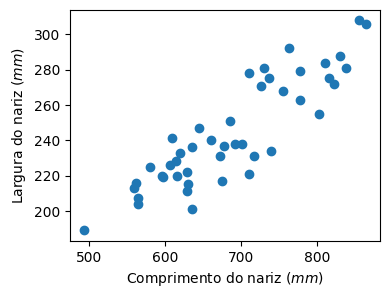

In [3]:
plt.figure(figsize=(4,3))
plt.scatter(nasal_length, nasal_width)
plt.xlabel("Comprimento do nariz ($mm$)")
plt.ylabel("Largura do nariz ($mm$)")
plt.show()

Podemos observar uma clara relação linear entre o comprimento do nariz e a sua respectva largura: quanto maior o comprimento do nariz, maior é a sua largura. O coeficiente de correlação nos informa qual é o tamanho desta relação:

In [4]:
r_pearson, _ = stats.pearsonr(nasal_length, nasal_width)
r_pearson

0.8814144365382706

Sabendo que o $r_{pearson}$ varia entre $-1$ e $+1$, e que a correlação entre o comprimento e a largura do nariz dos cangurus é de $0.881$, temos uma confirmação numérica do que observamos no gráfico: a correlação linear é positiva (quanto maior o comprimento do nariz, maior a sua largura) e forte.

## Susceptibilidade à presença de outliers

Vamos supor que ao coletar os dados, por um acaso de descontração, a última observação foi anotada como $516$ ou invés de $816$ (o número $8$ fica logo acima do número $5$ no teclado numérico). Qual será o impacto deste erro no valor do coeficiente? 

In [5]:
nasal_length[-1] = 516

In [6]:
r_pearson_outlier, _ = stats.pearsonr(nasal_length, nasal_width)
r_pearson_outlier

0.7949637461670415

O erro alterou o valor do coeficiente de $0.881$ para $0.794$! Um erro de anotação em único ponto (e que poderia passar desapercebido), em um dataset contendo 45 pontos, causou uma mudança importante no resultado. Portanto, o coeficiente de Pearson é influenciado por outliers.

Contudo, alguns pontos devem ser mencionados em relação à presença de outliers no dataset:


- Quanto menor o tamanho da amostra, mais intensa será a variação do $r_{pearson}$;
- Quanto mais distante da média, mais intensa será a variação do $r_{pearson}$;

> Para maiores detalhes sobre este ponto, procure por ***alavancagem*** (*leverage*).


Uma verificação visual seria suficiente para identificar algo suspeito neste daataset, um outlier que deveria ser investigado e então corrigido:

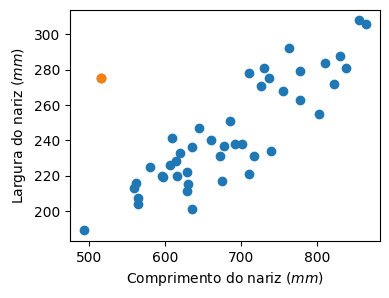

In [7]:
plt.figure(figsize=(4,3))
plt.scatter(nasal_length, nasal_width, label="Canguru")
plt.scatter(nasal_length[-1], nasal_width[-1], label="Outlier")
plt.xlabel("Comprimento do nariz ($mm$)")
plt.ylabel("Largura do nariz ($mm$)")
plt.show()

In [8]:
nasal_length[-1] = 816

## Significância

Obtemos que $r_{pearson}=0.881$. Mas será que este valor é estatisticamente significativo? Para descobrir isto, basta comparar o valor obtido com 0. Se eles forem estatisticamente iguais, podemos concluir que o valor obtido não é significativo; caso contrário, ele é significativo. Ou seja:

> $H_0$: $\rho = 0$;

> $H_1$: $\rho  \neq 0$;

onde 
- $\rho$ é o coeficiente de pearson populacional;

A estatística ( $t_0$ ) do teste é estimada da seguinte forma:

$$ t_0 = \frac{r_{pearson}\sqrt{n-2}}{\sqrt{1-r_{pearson}^2}}$$

onde:
- $n$ é o tamanho amostral;
- $r_{pearson}$ é o coeficiente de correlação;



In [9]:
t_calc_pearson = r_pearson*np.sqrt(len(nasal_length) - 2)/np.sqrt(1-np.square(r_pearson))
print("t0 = ", round(t_calc_pearson, 4))

t0 =  12.2365


O valor crítico do teste é obtido a partir da distribuição *t-Student bilateral* com $n-2$ graus de liberdade ***SE*** a hipótese nula for verdadeira. Para $95\%$ de confiança:

In [10]:
alpha = 0.05
t_critico_pearson = stats.t.ppf(1 - alpha/2, len(nasal_length) - 2)
print("t critico = ", round(t_critico_pearson, 4))

t critico =  2.0167


A a conclusão do teste é feita da seguinte forma:

> Se $|t_0| > t_{\left(1-\alpha /2, n-2 \right)}$ (ou $p-valor < \alpha$), temos evidências para rejeitar a hipótese nula, e $\rho \neq 0$;

> Se $|t_0| \leq t_{\left(1-\alpha /2, n-2 \right)}$ (ou $p-valor \geq \alpha$), não temos evidências para rejeitar a hipótese nula, e $\rho = 0$;


In [11]:
if t_calc_pearson > t_critico_pearson:
    print(f"Rejeita H0, e o coeficiente de Pearson é diferente de zero (com {100*(1-alpha)}% de confiança).")
else:
    print(f"Falha em rejeitar H0, e o coeficiente de Pearson é igual a zero (com {100*(1-alpha)}% de confiança).")

Rejeita H0, e o coeficiente de Pearson é diferente de zero (com 95.0% de confiança).


Podemos obter o $p-valor$ do teste da seguinte forma:

In [12]:
(1 - stats.t.cdf(t_calc_pearson, len(nasal_length)-2))*2

1.3322676295501878e-15

## Assimetria

Logo acima verificamos se o coeficiente de correlação era igual a zero, e para isto, utilizamos a distribuição t de Student. Isto nos diz que estamos admitindo que o coeficiente de Pearson é proveniente e uma distribuição Normal, mas estamos utilizando dados amostrais. 

Contudo, também foi dito que o resultado do teste era válido apenas ***SE*** a hipótese nula fosse ***verdadeira*** ( $\rho = 0$ ). Isto ocorre, pois, o único ponto em que a distribuição do coeficiente é Normal é em $\rho = 0$.

Suponha que $r_{pearson} = 0$. Este é o ponto central do valores que o coeficiente pode assumir ( $-1 \leq r_{pearson} \leq +1$ ): tanto para valores negativos, como positivos, existe uma mesma quantidade de valores que o coeficiente pode assumir (dados são simétricos).

Agora, suponha que $r_{pearson} = 0.5$. Neste caso, existe uma quantidade muito maior de valores abaixo de $0.5$ do que valores acima. Na verdade, temos $75\%$ dos possíveis valores que o $r_{pearson}$ pode assumir esta *abaixo* de $0.5$ e apenas $25\%$ dos possíveis valores esta *acima*. Isto faz com que a distribuição do coeficiente de Pearson seja *assimétrica* (*skewed*).

Portanto, não podemos utilizar a distribuição t de Student (ou a distribuição Normal) para valores de $\rho \neq 0$. Devemos utilizar a distribuição adequada, que é uma tangente hiperbólica inversa do coeficiente de Pearson:

$$ \mu_Z = arctanh (r_{pearson}) = \frac{1}{2} \ln{\left(\frac{1 + r_{pearson}}{1 - r_{pearson}} \right)} $$

onde:
- $\mu_Z$ é o valor médio estimado do coeficiente de Pearson na escala transformada.

que tem desvio padrão igual a:

$$ \sigma_Z = \sqrt{\frac{1}{n-3}} $$

onde:
- $n$ é o tamanho da amostra;

A transformação acima é chamada de transformação [r-para-Z de Fisher](https://en.wikipedia.org/wiki/Fisher_transformation) (*Fisher transformation*). É possível relacionar os possíveis valores do coeficiente de Pearson com o valor transformado, e obter uma visualização do formato da distribuição do coeficiente:


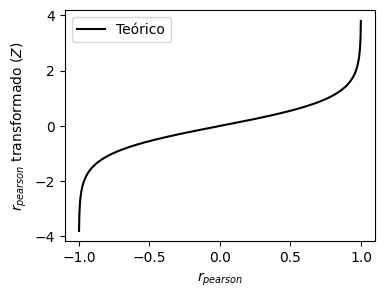

In [13]:
r_values = np.linspace(-0.999, .999, 1000)
r_values_z_scale = np.arctanh(r_values)
plt.figure(figsize=(4,3))
plt.plot(r_values, r_values_z_scale, label="Teórico", c="k")
plt.ylabel("$r_{pearson}$ transformado ($Z$)")
plt.xlabel("$r_{pearson}$")
plt.legend()
plt.show()

> Note que a função `arctanh` aceita apenas valores entre $-1$ e $+1$, com intervalo aberto.



## Teste de médias

A estatística do teste para $\rho = \rho_{0}$ (onde $\rho_{0}$ é o valor esperado para o coeficiente de Pearson) é estimada da seguinte forma:


$$ Z_0 = \left( arctanh \left( r \right) - arctanh \left( \rho_0 \right) \right) \times \sqrt{n-3} $$

onde $\rho_0$ é o valor esperado para o coeficiente de correlação. As hipóteses para este caso são:


> $H_0$: $\rho = \rho_0$;

> $H_1$: $\rho  \neq \rho_0$;

Os valores críticos são obtidos da distribuição Normal padrão bilateral ( $Z_{\left( 1-\alpha/2 \right)} $). A conclusão do teste é feita da seguinte forma:

> Se $|Z_0| > Z_{\left(1-\alpha/2 \right)}$ (ou $p-valor < \alpha$), temos evidências para rejeitar a hipótese nula, e $\rho \neq \rho_0$;

> Se $|Z_0| \leq Z_{\left(1-\alpha/2 \right)}$ (ou $p-valor \geq \alpha$), não temos evidências para rejeitar a hipótese nula, e $\rho = \rho_0$;

Para exemplificar, vamos verificar se o coeficiente de Pearson do conjunto de dados é igual a $\rho_{0}=0.99$. A estatística do teste é estimada da seguinte forma:


In [14]:
rho_0 = 0.99

In [15]:
Z_0 = (np.arctanh(r_pearson) - np.arctanh(rho_0))*np.sqrt((len(nasal_length) - 3))
Z_0

-8.19541651911788

E agora precisamos do valor crítico, que é obtido da distribuição Normal

In [16]:
z_critical = stats.norm.ppf(1 - alpha/2)
z_critical

1.959963984540054

E a conclusão do teste é feita comparando a estatística do teste com o valor crítico:

In [17]:
if np.abs(Z_0) > z_critical:
    print(f"Rejeita H0, e o coeficiente de Pearson ({round(r_pearson, 4)}) é diferente de {rho_0} (com {100*(1-alpha)}% de confiança).")
else:
    print(f"Falhar em rejeitar H0, e o coeficiente de Pearson ({round(r_pearson, 4)}) é igual a {rho_0} (com {100*(1-alpha)}% de confiança).")

Rejeita H0, e o coeficiente de Pearson (0.8814) é diferente de 0.99 (com 95.0% de confiança).


Podemos plotar o valor do coeficiente de Pearson no gráfico. Basta utilizar o valor transformado no eixo y e o valor real no eixo x.

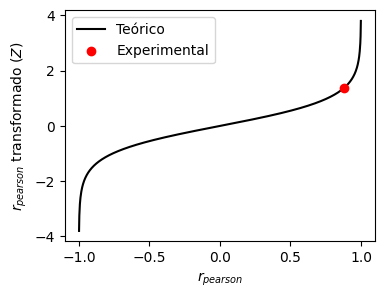

In [18]:
r_values = np.linspace(-0.999, .999, 1000)
r_values_z_scale = np.arctanh(r_values)
plt.figure(figsize=(4,3))
plt.plot(r_values, r_values_z_scale, label="Teórico", c="k", zorder=-1)
plt.scatter(r_pearson, np.arctanh(r_pearson), c='r', label="Experimental")
plt.ylabel("$r_{pearson}$ transformado ($Z$)")
plt.xlabel("$r_{pearson}$")
plt.legend()
plt.show()

## Intervalo de confiança

O intervalo de confiança é estimado na escala transformada de forma semelhante ao que é feito no intervalo paramétrico, necessitando transformar o resultado para a escala original. 

O intervalo de confiança inferior é calculado através da relação:

$$ LI_{pearson} = \tanh{\left(arctahnh \; \left(r_{pearson} \right) - \frac{Z_{\left( 1-\alpha/2 \right) }}{\sqrt{n-3}}\right)} $$

E o limite superior é:

$$ LI_{pearson} = \tanh{\left(arctahnh \; \left(r_{pearson} \right) + \frac{Z_{\left( 1-\alpha/2 \right) }}{\sqrt{n-3}}\right)} $$

In [19]:
# obtendo a média do r-pearson na escala transformada
r_pearson_z_scale = np.arctanh(r_pearson)
r_pearson_z_scale

1.3820721891276904

In [20]:
# obtendo o intervalo de confiança baseado na distribuição Normal
ic_z_scale = z_critical/np.sqrt(len(nasal_length)-3)
ic_z_scale

0.30242900861958005

In [21]:
ic_lower_z_scale = r_pearson_z_scale - ic_z_scale
ic_lower_z_scale

1.0796431805081104

In [22]:
ic_upper_z_scale = r_pearson_z_scale + ic_z_scale
ic_upper_z_scale

1.6845011977472704

In [23]:
# transformando para a escala original
ic_lower = np.tanh(ic_lower_z_scale)
ic_lower

0.7930667384028646

In [24]:
ic_upper = np.tanh(ic_upper_z_scale)
ic_upper

0.9334432244557522

Assim, o intervalo de confiança é:

In [25]:
f"{round(ic_lower, 4)} <= {round(r_pearson, 4)} <= {round(ic_upper, 4)} (com {100*(1-alpha)}% de confiança)."

'0.7931 <= 0.8814 <= 0.9334 (com 95.0% de confiança).'

### Gráfico

Podemos adicionar o intervalo de confiança no gráfico, de modo a visualizar melhor o comportamento assimétrico

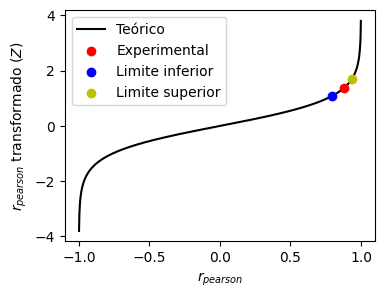

In [26]:
r_values = np.linspace(-0.999, .999, 1000)
r_values_z_scale = np.arctanh(r_values)
plt.figure(figsize=(4,3))
plt.plot(r_values, r_values_z_scale, label="Teórico", c="k", zorder=-1)
plt.scatter(r_pearson, np.arctanh(r_pearson), c='r', label="Experimental")
plt.scatter(ic_lower, ic_lower_z_scale, label="Limite inferior", c="b")
plt.scatter(ic_upper, ic_upper_z_scale, label="Limite superior", c="y")
plt.ylabel("$r_{pearson}$ transformado ($Z$)")
plt.xlabel("$r_{pearson}$")
plt.legend()
plt.show()

Uma edição mais adequada resulta em:

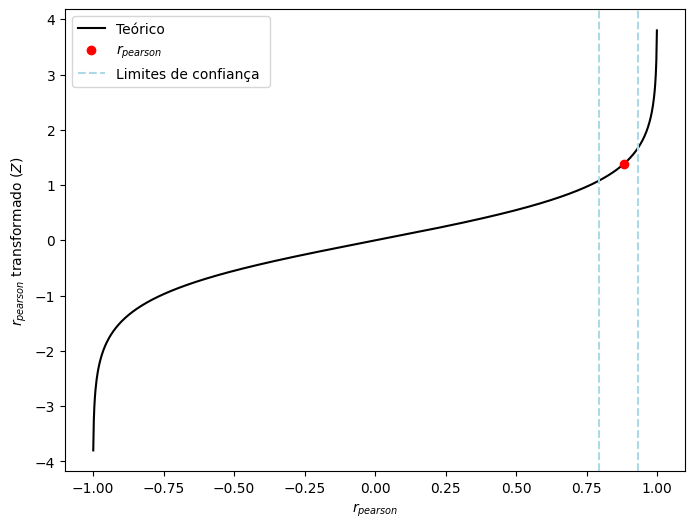

In [27]:
plt.figure(figsize=(8,6))
plt.plot(r_values, r_values_z_scale, label="Teórico", c="k", zorder=-1)
plt.scatter(r_pearson, r_pearson_z_scale, label="$r_{pearson}$", c="r")
plt.axvline(x=ic_lower, ymin=0, ymax=1, c="lightblue", ls="--", label="Limites de confiança ", )
plt.axvline(x=ic_upper, ymin=0, ymax=1, c="lightblue", ls="--")
plt.ylabel("$r_{pearson}$ transformado ($Z$)")
plt.xlabel("$r_{pearson}$")
plt.legend()
plt.show()

### Comentários

Um ponto relevante a ser discutido é o uso da distribuição Normal para obter os valores críticos. Para amostras pequenas ( $n<30$ ) provavelmente é mais adequado utilizar a distribuição t de Student. Isto levaria a outra questão, que é a quantidade de graus de liberdade que deve ser utilizada para obter o valor crítico (provavelmente $n-3$).

Dessa forma, o intervalo de confiança e o teste de média para dados amostrais pequenos não é muito confiável, pois o intervalo esta sub-estimado). 



## Intervalo de confiança variando o tamanho amostral

Por fins de curiosidade (e ignorando a questão levantada em relação ao uso da distribuição Normal/t de Student e do tamanho amostral), vamos avaliar o impacto do tamanho amostral tanto no valor médio do coeficiente de Pearson, como no seu intervalo de confiança.

Para isto, vou estimar o coeficiente de Pearson e seu intervalo de confiança para as primeiras 5 observações. Depois para 6 observações. Depois para 7, e assim por diante até as completar as 45 observações.

In [28]:
def pearson_interval(x, y, alpha=0.05):
    z_critical = stats.norm.ppf(1 - alpha/2)
    r_pearson, _ = stats.pearsonr(x, y)
    r_pearson_z_scale = np.arctanh(r_pearson)
    ic_z_scale = z_critical/np.sqrt(len(x)-3)
    ic_lower_z_scale = r_pearson_z_scale - ic_z_scale
    ic_upper_z_scale = r_pearson_z_scale + ic_z_scale
    ic_lower = np.tanh(ic_lower_z_scale)
    ic_upper = np.tanh(ic_upper_z_scale)    
    
    return ic_lower, r_pearson, ic_upper, alpha
    

In [29]:
for i in range(5, len(nasal_length) + 1):
    ic_lower, r_pearson, ic_upper, _ = pearson_interval(nasal_length[:i], nasal_width[:i], alpha=0.05)
    print(f"Para n={i}: {round(ic_lower, 4)} <= {round(r_pearson, 4)} <= {round(ic_upper, 4)}.")

Para n=5: -0.3262 <= 0.7808 <= 0.9847.
Para n=6: 0.385 <= 0.9117 <= 0.9904.
Para n=7: 0.5049 <= 0.9114 <= 0.987.
Para n=8: 0.5854 <= 0.9133 <= 0.9844.
Para n=9: 0.4226 <= 0.8486 <= 0.9675.
Para n=10: 0.3911 <= 0.819 <= 0.9558.
Para n=11: 0.5837 <= 0.8766 <= 0.9676.
Para n=12: 0.6045 <= 0.8749 <= 0.9645.
Para n=13: 0.6665 <= 0.8905 <= 0.967.
Para n=14: 0.7743 <= 0.9249 <= 0.9764.
Para n=15: 0.8167 <= 0.937 <= 0.9792.
Para n=16: 0.8186 <= 0.9349 <= 0.9776.
Para n=17: 0.8343 <= 0.9386 <= 0.978.
Para n=18: 0.7941 <= 0.9199 <= 0.9701.
Para n=19: 0.7841 <= 0.9131 <= 0.9665.
Para n=20: 0.7441 <= 0.8927 <= 0.9571.
Para n=21: 0.7867 <= 0.9095 <= 0.9631.
Para n=22: 0.8004 <= 0.9137 <= 0.964.
Para n=23: 0.8184 <= 0.9202 <= 0.966.
Para n=24: 0.8396 <= 0.9285 <= 0.969.
Para n=25: 0.8433 <= 0.9289 <= 0.9686.
Para n=26: 0.8567 <= 0.9341 <= 0.9703.
Para n=27: 0.8637 <= 0.9364 <= 0.9709.
Para n=28: 0.8654 <= 0.9362 <= 0.9704.
Para n=29: 0.8708 <= 0.938 <= 0.9708.
Para n=30: 0.8757 <= 0.9396 <= 0.9711.


Podemos observar uma flutuação grande do $r_{pearson}$ para dados com tamanho amostral baixo, com uma estabilização na medida em que o tamanho amostral aumenta; comportamento similar é observado com o intervalo de confiança.

Contudo, valores numéricos não são tão bons para verificar o comportamento. Uma forma de visualizar os resultados numéricos de forma compacta é através do gráfico de erros, onde relacionamos o coeficiente de Pearson (com a barra de erro adicionada) com o tamanho amostral.

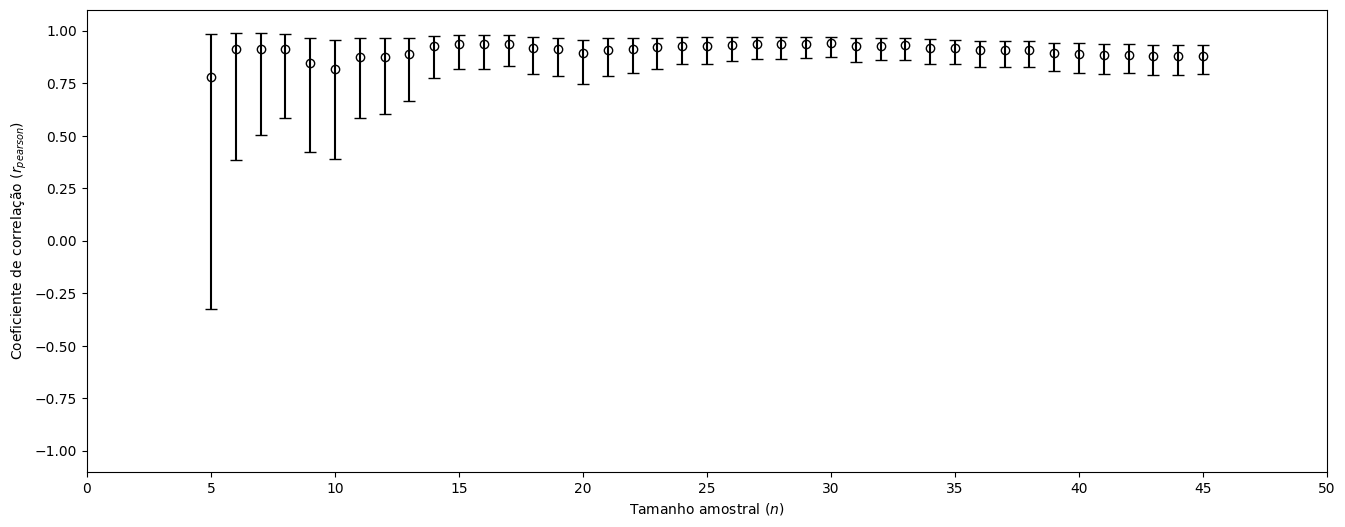

In [30]:
l = []
c = []
u = []

for i in range(5, len(nasal_length)+1):
    ic_lower, r_pearson, ic_upper, alpha = pearson_interval(x=nasal_length[:i], y=nasal_width[:i])
    l.append(ic_lower)
    c.append(r_pearson)
    u.append(ic_upper)
    
l = np.array(l)
c = np.array(c)
u = np.array(u)

plt.figure(figsize=(16,6))
plt.errorbar(range(5,len(nasal_length)+1), c, yerr=(c-l, u-c), capsize=4, color="none", ecolor="k", marker='o', mfc='none', mec='k',
            label="$r_{pearson}$")
plt.ylim(-1.1,1.1)
plt.ylabel("Coeficiente de correlação ($r_{pearson}$)")
plt.xlabel("Tamanho amostral ($n$)")
plt.xticks(np.linspace(0,50,11))

plt.show()    

Desta forma, fica mais evidente a variação observada. Também podemos visualizar que, quanto menor (quanto mais próximo de 0 na verdade) é o valor do coeficiente de Pearson, maior é o seu intervalo de confiança (resultado esperado devido a natureza exponencial da distribuição dos dados).

Uma outra forma de visualizar estes dados é utilizando um par de gráficos lado a lado. No gráfico do lado esquerdo, plotamos o gráfico de dispersão com apenas os dados. No gráfico do lado direito, plotamos o gráfico com a distribuição teórica e o intervalo de confiança estimado para o $r_{pearson}$:



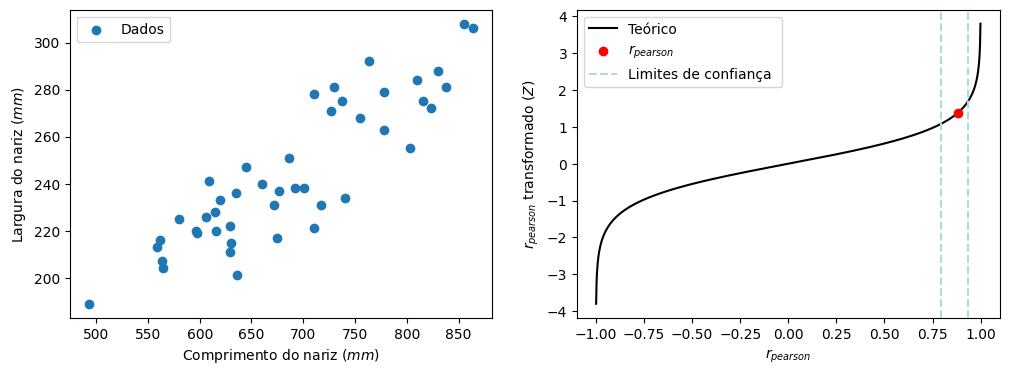

In [31]:
r_values = np.linspace(-0.999, .999, 1000)
r_values_z_scale = np.arctanh(r_values)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.scatter(nasal_length, nasal_width, label="Dados")
ax1.set_xlabel("Comprimento do nariz ($mm$)")
ax1.set_ylabel("Largura do nariz ($mm$)")
ax1.legend(loc=2)

ic_lower, r_pearson, ic_upper, alpha = pearson_interval(nasal_length, nasal_width, alpha=0.05)

ax2.plot(r_values, r_values_z_scale, label="Teórico", c="k", zorder=-1)
ax2.scatter(r_pearson, np.arctanh(r_pearson), label="$r_{pearson}$", c="r")
ax2.axvline(x=ic_lower, ymin=0, ymax=1, c="lightblue", ls="--", label="Limites de confiança ", )
ax2.axvline(x=ic_upper, ymin=0, ymax=1, c="lightblue", ls="--")
ax2.set_ylabel("$r_{pearson}$ transformado ($Z$)")
ax2.set_xlabel("$r_{pearson}$")
ax2.legend(loc=2)
plt.show()

Podemos utilizar a mesma lógica anterior, e ir incrementando o tamanho amostral para ter uma ideia do seu impacto:


![alt text](https://raw.githubusercontent.com/andersonmdcanteli/statistic/master/Python/pt-br/r-pearson/r-plot-scatter-teoretical/r-plot-scatter-teoretical.gif "gif gerado com os gráficos de Pearson")


Clique [aqui](https://github.com/andersonmdcanteli/statistic/blob/master/Python/pt-br/r-pearson/r-plot-scatter-teorico.ipynb) para acessar o script que criou o gif acima.

Podemos explorar um pouco mais a visualização dos dados, pensando na ordem de aquisição dos dados. Os dados *devem* ser obtidos de forma aleatória. Ou seja, o primeiro par de dados de comprimento e largura do nariz dos nossos amigos que vivem em bolsas foi obtido ao acaso de uma população de cangurus. O segundo par de dados também foi obtido ao acaso da mesma população de cangurus, não considerando o primeiro. E assim por diante.

O que fizemos acima para avaliar o impacto do tamanho amostral não utiliza uma amostragem aleatória; sempre é utilizada a ordem pré-definida dos dados. Podemos contornar isto, fazendo uma aleatorização da amostragem.

Ou seja, embaralhamos os dados e obtemos 5 amostras e fazemos os cálculos. Repomos as 5 observações, embaralhamos os dados, obtemos 6 amostras e fazemos os cálculos. E assim por diante até completarmos $n=45$.

Podemos repetir o processo descrito acima por inúmeras vezes (obtendo uma quantidade quase infinita de datasets reduzidos), obtendo uma grande variabilidade dos dados, especialmente para tamanho amostral pequeno.

Por exemplo, para uma amostra com $n_{amostra}=5$ e $n=45$, temos:

$$C_{n,n_{amostra}} = \frac{n!}{n_{amostra}!\left(n-n_{amostra}\right)!}$$

combinações. Ou seja:

In [32]:
from scipy.special import factorial

In [33]:
n = len(nasal_length)
n_sample = 5
factorial(n)/(factorial(n_sample)*factorial(n-n_sample))

1221759.0000000005

Assim, existem mais de 1 milhão de possibilidades de obter a amostras diferentes de tamanho igual a cinco. Decidi realizar 100 corridas de 5 até 45 amostras, aleatorizando a cada amostragem, o que gera 4100 gráficos. O gráfico final com todas as camadas sobrepostas esta apresentado abaixo. 


![alt text](https://raw.githubusercontent.com/andersonmdcanteli/statistic/master/Python/pt-br/r-pearson/r-plot-interval/4100.png "Exemplo de gráfico gerado ")

Note que as barras de erro foram substituidas por área preenchida entre o limite de confiança inferior e superior. 

Clique no vídeo abaixo para visualizar todas as aleatorizações em sequência se sobrepondo (2 minutos).


[![](https://markdown-videos.deta.dev/youtube/gc4f-Wrx4zw)](https://youtu.be/gc4f-Wrx4zw)

Clique [aqui](https://github.com/andersonmdcanteli/statistic/blob/master/Python/pt-br/r-pearson/simulacao-conf-inter.ipynb) para acessar o script que fez o gráfico acima.

## Wrapping up

- O coeficiente de Pearson mede a intensidade da relação entre duas variáveis;
- Ele é susceptível a presença de outliers;
- Ele tem distribuição Normal apenas em $\rho = 0$;
- Para outros pontos sua distribuição é assimétrica;
- O Intervalo de confiança é largo, especialmente para correlação não forte;
- Quanto maior o tamanho amostral, menor o seu intervalo de confiança;
- Quanto mais longo o nariz dos cangurus, maior é a sua largura.



## Disclaimer

A origem dos dados utilizados é incerta. Os valores numéricos foram obtidos do [college.cengage.com](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr07.html), que cita o artigo Australian Journal of Zoology, Vol. 28, p607-613, sem maiores detalhes.

Uma busca pela revista nos leva ao artigo "Species Determination by Multivariate Analysis of Measurements from the Skulls of Historic Specimens of Grey Kangaroos, attributed to Macropus fuliginosus (Desmarest), from Kangaroo Island, South Australia", por  [Poole & Carpenter (1980)](https://doi.org/10.1071/ZO9800607), que não traz uma análise de medidas do crânio de cangurus em si, mas um estudo onde é feita uma análise multivariada para determinar a espécie de 4 indivíduos que estão em museus na Europa, baseado em um estudo anterior.

O estudo preliminar citado é "Multivariate Analyses of Skull Morphometrics from the Two Species of Grey Kangaroos, Macropus giganteus Shaw and M. fuliginosus (Desmarest)" por [Poole, Carpenter & Simms (1980)](https://doi.org/10.1071/ZO9800591). Neste artigo foram realizadas diversas medidas do crânio de 148 cangurus, de ambos os sexos e 3 espécies diferentes. Para o comprimento e largura do nariz, os resultados indicaram diferença entre espécies, entre sexo, e entre a combinação de sexo e espécie. 

Provavelmente os dados utilizados nesta breve análise são oriundos de Poole, Carpenter & Simms (1980), e contemplam medidas de uma única espécie de cangurus machos.


# Referências

- [college.cengage.com](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr07.html), acesso em 10/02/2023;

- Dou, S. (2018, May 30). How to compute confidence interval for Pearson’s r? A brief guide. Medium. https://shandou.medium.com/how-to-compute-confidence-interval-for-pearsons-r-a-brief-guide-951445b9cb2d. Acesso em 04/02/2023.

- Montgomery, D. C.; Peck, L. A.; Vining G. G. (2012). Introduction to Linear Regression Analysis (5ª Edição). JOHN WILEY & SONS, INC.

- Poole, W.E.; Carpenter, S.M.; Simms, N.G., Multivariate Analyses of Skull Morphometrics from the Two Species of Grey Kangaroos, Macropus giganteus Shaw and M. fuliginosus (Desmarest), Australian Journal of Zoology, v. 28(4), p. 591-605, 1980;

- Poole, W.E.; Carpenter, S.M., Species Determination by Multivariate Analysis of Measurements from the Skulls of Historic Specimens of Grey Kangaroos, attributed to Macropus fuliginosus (Desmarest), from Kangaroo Island, South Australia, Australian Journal of Zoology, v. 28(4), p. 607-613, 1980.

- Re: Loftus, G. R. & Loftus, E. F. (1988). Essence of Statistics (2ª Edition). New York: McGraw Hill. Disponível em <https://faculty.washington.edu/gloftus/P317-318/Useful_Information/r_to_z/PearsonrCIs.pdf>.

- Wikipedia contributors. (2023, January 29). Fisher transformation. Wikipedia. https://en.wikipedia.org/wiki/Fisher_transformation. Acesso em 04/02/2023.



